# Mastering Applied Skills in Management, Analytics and Entrepreneurship I

## DATA COLLECTION TECHNIQUES
## Part VII. Get data from API

### 1. Libraries and credentials

In [1]:
import os
import json
import requests

In [2]:
def access_data(file_path):
    with open(file_path) as file:
        access_data = json.load(file)
    return access_data

creds = access_data(file_path='access_vkapi.json')
print(creds.keys())

dict_keys(['token'])


In [3]:
VER = '5.126'
TOKEN = creds['token']

# Let's start from two GSOM groups in VK
URL_SPBU = 'https://vk.com/gsom.spbu'
URL_ABTR = 'https://vk.com/gsom_abiturient'
GROUP_SPBU = 'gsom.spbu'
GROUP_ABTR = 'gsom_abiturient'

### 2. VK API first steps

Complete manual for VK API is [here](https://dev.vk.com/api/getting-started).

#### 2.1. Groups' descriptions

In [4]:
groups = GROUP_SPBU +',' + GROUP_ABTR
method = 'groups.getById'
fields = 'city,country,place,description,members_count'
# all fields are here: https://vk.com/dev/objects/group

In [5]:
url = ''.join([
    f'https://api.vk.com/method/{method}?',
    f'group_ids={groups}',
    f'&fields={fields}',
    f'&access_token={TOKEN}',
    f'&v={VER}'
])
print(url)

https://api.vk.com/method/groups.getById?group_ids=gsom.spbu,gsom_abiturient&fields=city,country,place,description,members_count&access_token=48517e4748517e4748517e47cc4b405ba34485148517e472b0398d3525b13f8005fd6d6&v=5.126


In [6]:
r = requests.get(url)

In [7]:
type(r)

requests.models.Response

In [8]:
r.text

'{"response":[{"id":168,"city":{"id":2,"title":"Санкт-Петербург"},"country":{"id":1,"title":"Россия"},"description":"Официальное сообщество абитуриентов, студентов, выпускников и преподавателей ведущей российской Бизнес-школы, созданной на базе Санкт-Петербургского государственного университета, старейшего российского университета, крупнейшего центра науки, образования и культуры. \\n\\nЕдинственный в России обладатель «тройной короны» международных аккредитаций — независимых ассоциаций AACSB, EQUIS и AMBA, — входит в 1% лучших бизнес-школ мира, обладающих аналогичным признанием. \\n\\nЯвляется признанным центром научных исследований и обучения в области менеджмента. \\n\\nВ Попечительский совет ВШМ СПбГУ входят лидеры бизнеса, органов власти и международного академического сообщества.\\n\\nВШМ СПбГУ готовит специалистов в области менеджмента на программах: бакалавриата, магистратуры, аспирантуры, MBA, Executive МВА и корпоративных программах повышения квалификации. \\n\\nПодробнее о п

In [9]:
r.json()

{'response': [{'id': 168,
   'city': {'id': 2, 'title': 'Санкт-Петербург'},
   'country': {'id': 1, 'title': 'Россия'},
   'description': 'Официальное сообщество абитуриентов, студентов, выпускников и преподавателей ведущей российской Бизнес-школы, созданной на базе Санкт-Петербургского государственного университета, старейшего российского университета, крупнейшего центра науки, образования и культуры. \n\nЕдинственный в России обладатель «тройной короны» международных аккредитаций — независимых ассоциаций AACSB, EQUIS и AMBA, — входит в 1% лучших бизнес-школ мира, обладающих аналогичным признанием. \n\nЯвляется признанным центром научных исследований и обучения в области менеджмента. \n\nВ Попечительский совет ВШМ СПбГУ входят лидеры бизнеса, органов власти и международного академического сообщества.\n\nВШМ СПбГУ готовит специалистов в области менеджмента на программах: бакалавриата, магистратуры, аспирантуры, MBA, Executive МВА и корпоративных программах повышения квалификации. \n\nП

In [10]:
data = r.json()
type(data)

dict

In [11]:
data.keys()

dict_keys(['response'])

In [12]:
type(data['response'])

list

In [13]:
len(data['response'])

2

In [14]:
data['response'][0].keys()

dict_keys(['id', 'city', 'country', 'description', 'members_count', 'name', 'screen_name', 'is_closed', 'type', 'photo_50', 'photo_100', 'photo_200'])

In [15]:
data['response'][1].keys()

dict_keys(['id', 'city', 'country', 'description', 'members_count', 'name', 'screen_name', 'is_closed', 'type', 'photo_50', 'photo_100', 'photo_200'])

In [16]:
for item in data['response']:
    print('=' * 70)
    for k, v in item.items():
        print('-' * 70)
        print('key:', k)
        print('value:', v)

----------------------------------------------------------------------
key: id
value: 168
----------------------------------------------------------------------
key: city
value: {'id': 2, 'title': 'Санкт-Петербург'}
----------------------------------------------------------------------
key: country
value: {'id': 1, 'title': 'Россия'}
----------------------------------------------------------------------
key: description
value: Официальное сообщество абитуриентов, студентов, выпускников и преподавателей ведущей российской Бизнес-школы, созданной на базе Санкт-Петербургского государственного университета, старейшего российского университета, крупнейшего центра науки, образования и культуры. 

Единственный в России обладатель «тройной короны» международных аккредитаций — независимых ассоциаций AACSB, EQUIS и AMBA, — входит в 1% лучших бизнес-школ мира, обладающих аналогичным признанием. 

Является признанным центром научных исследований и обучения в области менеджмента. 

В Попечительский

## <font color='red'>INTERMEDIATE QUIZ</font>
We are going to collect data from `gsom_ma` VK group and we will need to get `id` of that group for further data collection, so:
1. Get the data for `gsom_ma` group
2. Extract `id` for this group from the data

In [17]:
# YOUR CODE HERE
id_gsom_ma = data['response'][0]['id']

In [18]:
id_gsom_ma

168

#### 2.2. Get data on walls

Here we can get all records from the wall of the selected group. The method [wall.get](https://dev.vk.com/method/wall.get) is used for that purpose.

In [38]:
owner_id = id_gsom_ma
offset = 0 # to start with
count = 5 # how many records to get
method = 'wall.get'

In [36]:
url = ''.join([
    f'https://api.vk.com/method/{method}?',
    f'owner_id=-{owner_id}',
    f'&offset={offset}',
    f'&count={count}',
    f'&access_token={TOKEN}',
    f'&v={VER}'
])
r = requests.get(url)
data = r.json()

In [37]:
data.keys()

dict_keys(['error'])

In [22]:
len(data['response'])

2

In [23]:
data['response'].keys()

dict_keys(['count', 'items'])

In [24]:
# how many records are on the wall
data['response']['count']

4574

In [34]:
data

{'response': {'count': 4574,
  'items': [{'inner_type': 'wall_wallpost',
    'donut': {'is_donut': False},
    'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True},
    'marked_as_ads': 0,
    'short_text_rate': 0.8,
    'hash': 'sGJN3IyEvRIl7k1dtg',
    'type': 'post',
    'attachments': [{'type': 'photo',
      'photo': {'album_id': -7,
       'date': 1701099080,
       'id': 457244502,
       'owner_id': -168,
       'access_key': 'c781b9040fc5641be9',
       'post_id': 9144,
       'sizes': [{'height': 75,
         'type': 's',
         'width': 75,
         'url': 'https://sun9-16.userapi.com/impg/v21lcZYUIsloPQ6hspPDKwN-MfybVQK5Qs95QA/lnHOgiV0pMs.jpg?size=75x75&quality=95&sign=6060e7f4952126977cd470ef95a9823d&c_uniq_tag=cmPH2NRHHXgbWYT5uXZzNF3oZKl8aLGYPObnzq6V_RU&type=album'},
        {'height': 130,
         'type': 'm',
         'width': 130,
         'url': 'https://sun9-16.userapi.com/impg/v21lcZYUIsloPQ6hspPDKwN-MfybVQK5Qs95QA/lnHOgiV0pMs.jpg?size=130x130&quality

In [33]:
data['response']['items'][-1]

{'inner_type': 'wall_wallpost',
 'donut': {'is_donut': False},
 'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True},
 'marked_as_ads': 0,
 'short_text_rate': 0.8,
 'hash': 'hyn1m-N_upYSfio2cg',
 'type': 'post',
 'carousel_offset': 0,
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1700839958,
    'id': 457244460,
    'owner_id': -168,
    'access_key': 'c289e0832f8ee46614',
    'sizes': [{'height': 75,
      'type': 's',
      'width': 75,
      'url': 'https://sun9-42.userapi.com/impg/ieILZdn6nlDYB7QxL5r4opLbUatuImWDBHtF5A/ZuEsEx5T0G8.jpg?size=75x75&quality=95&sign=dcf2d87347f76fc17f3492bcd07940aa&c_uniq_tag=dcHHkhn0BrRjVRoi-iPl7KuHnhTzziMKHByHU-fHaHM&type=album'},
     {'height': 130,
      'type': 'm',
      'width': 130,
      'url': 'https://sun9-42.userapi.com/impg/ieILZdn6nlDYB7QxL5r4opLbUatuImWDBHtF5A/ZuEsEx5T0G8.jpg?size=130x130&quality=95&sign=e9feff6eadfe34abc61b18a3e50c8317&c_uniq_tag=NopiPBhB3DpRRFYTH-j18T8DSw9ULf-1K5ui-v06dDQ&type=

In [25]:
# data on records itself
len(data['response']['items'])

5

In [26]:
data['response']['items'][0]

{'inner_type': 'wall_wallpost',
 'donut': {'is_donut': False},
 'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True},
 'marked_as_ads': 0,
 'short_text_rate': 0.8,
 'hash': 'sGJN3IyEvRIl7k1dtg',
 'type': 'post',
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1701099080,
    'id': 457244502,
    'owner_id': -168,
    'access_key': 'c781b9040fc5641be9',
    'post_id': 9144,
    'sizes': [{'height': 75,
      'type': 's',
      'width': 75,
      'url': 'https://sun9-16.userapi.com/impg/v21lcZYUIsloPQ6hspPDKwN-MfybVQK5Qs95QA/lnHOgiV0pMs.jpg?size=75x75&quality=95&sign=6060e7f4952126977cd470ef95a9823d&c_uniq_tag=cmPH2NRHHXgbWYT5uXZzNF3oZKl8aLGYPObnzq6V_RU&type=album'},
     {'height': 130,
      'type': 'm',
      'width': 130,
      'url': 'https://sun9-16.userapi.com/impg/v21lcZYUIsloPQ6hspPDKwN-MfybVQK5Qs95QA/lnHOgiV0pMs.jpg?size=130x130&quality=95&sign=b90b12c403d6745fca818446822b4f5f&c_uniq_tag=GZwzKwSd0TFUWyPELtQDGnhLuJMdmdcNUCwhTlESiLk&type=al

In [27]:
# attention - date as integer timestamp
data['response']['items'][0]['date']

1701101400

In [28]:
import datetime
date = datetime.datetime.fromtimestamp(data['response']['items'][0]['date'])
date

datetime.datetime(2023, 11, 27, 16, 10)

In [29]:
for item in data['response']['items']:
    print('=' * 70)
    print('id:', item['id'], 
          '| date:', datetime.datetime.fromtimestamp(item['date']), 
          '\n', item['text'], '\n')

id: 9145 | date: 2023-11-27 16:10:00 
 Завтра мы объявим победителей розыгрыша карьерных консультаций 🔥

А это значит, что осталась последняя возможность принять участие и стать одним из трех победителей. Напомним, что мы объявили розыгрыш на Дне открытых дверей программ магистратуры ВШМ СПбГУ, который прошел 24 ноября: https://vk.cc/csHRUU

Карьерная консультация в Центре карьер ВШМ СПбГУ — помощь с составлением карьерного плана и целей, резюме и подготовкой к интервью. Поддержка в самом начале карьерного пути сделает его проще и понятнее, даже если сейчас много сомнений. 

📣  Подводим итоги 28 ноября в 18:00. 

Ссылка на форму для участия в розыгрыше: https://vk.cc/csHRXV

После заполнения на вашу почту придет уникальный номер участника. 

id: 9143 | date: 2023-11-27 15:30:01 
 Визуализация — ключ к усвоению информации, согласны? 🤓

В современном мире мы активно используем визуализацию и оцифровку информации, ведь это сильно упрощает ее понимание.

Сегодня решили представить студенче

## <font color='red'>INTERMEDIATE QUIZ</font>
We already know how to get data on posts in the group. Now let's draw a barplot for posts' views that depend on time. So the task is:
1. Load from 10 to 20 records (posts) from the group
2. Extract data on posts' views (__HINT:__ find `views` and `count` keys), and the timestamps for the posts (HINT: find `date` key)
3. Draw a barplot for `views` depending on time

### <font color='green'>Solution</font>

In [ ]:
# YOUR CODE HERE

In [ ]:
# HINT to draw a barplot

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.bar(dates, views)
plt.xticks(dates, rotation='vertical')
plt.show()

### 3. VK API headhunt

We can get the data not only on the groups but also on the members of that groups:
- method [`getMembers`](https://dev.vk.com/method/groups.getMembers) to get list of members
- method [`users/get`](https://dev.vk.com/method/users.get) to get the data on specified users

#### 3.1. Get all members of the group

In [39]:
group_name = 'gsom_ma'
offset = 0 # to start from
count = 100 # number of members to get their ids
method = 'groups.getMembers'

In [40]:
url = ''.join([
    f'https://api.vk.com/method/{method}?',
    f'group_id={group_name}',
    f'&offset={offset}',
    f'&count={count}',
    f'&access_token={TOKEN}',
    f'&v={VER}'
])
print(url)

https://api.vk.com/method/groups.getMembers?group_id=gsom_ma&offset=0&count=100&access_token=48517e4748517e4748517e47cc4b405ba34485148517e472b0398d3525b13f8005fd6d6&v=5.126


In [41]:
r = requests.get(url)
data = r.json()
print(
    'group:', group_name,
    '| total members:', data['response']['count'], 
    '| loaded:', len(data['response']['items'])
)

group: gsom_ma | total members: 3204 | loaded: 100


In [42]:
data['response']

{'count': 3204,
 'items': [1212,
  2239,
  2603,
  6775,
  9379,
  10352,
  10615,
  11738,
  13316,
  13692,
  15949,
  16918,
  18619,
  19388,
  22699,
  26809,
  28554,
  31053,
  31439,
  32930,
  36220,
  36823,
  38049,
  38445,
  42699,
  44856,
  47976,
  48450,
  49312,
  51775,
  53078,
  54598,
  55545,
  58412,
  60668,
  67910,
  72390,
  74243,
  80126,
  80872,
  81003,
  82348,
  82678,
  87332,
  91132,
  91206,
  91221,
  91800,
  92595,
  108498,
  109641,
  111195,
  117166,
  117297,
  127575,
  129079,
  134261,
  135227,
  137330,
  139007,
  140257,
  142816,
  150422,
  151355,
  152285,
  154456,
  157351,
  160111,
  160401,
  161031,
  162769,
  179120,
  179683,
  187703,
  199601,
  202251,
  209018,
  211448,
  212000,
  216579,
  216764,
  217176,
  217838,
  220040,
  225042,
  227877,
  228981,
  246781,
  250596,
  257259,
  258939,
  261627,
  267110,
  273597,
  279164,
  280054,
  285671,
  295515,
  298446,
  304552],
 'next_from': 'PUkGEFNHDhJkU

In [43]:
list_of_members = data['response']['items']
print(len(list_of_members))

100


In [44]:
list_of_members[:10]

[1212, 2239, 2603, 6775, 9379, 10352, 10615, 11738, 13316, 13692]

#### 3.2. Get data on the one member

In [45]:
method = 'users.get'
user = '1212'

In [ ]:
# all fields https://vk.com/dev/objects/user
fields = 'sex,bdate,city,country,home_town,education,universities,schools,status,last_seen,occupation'

In [46]:
url = ''.join([
    f'https://api.vk.com/method/{method}?',
    f'user_ids={user}',
    f'&fields={fields}',
    f'&access_token={TOKEN}',
    f'&v={VER}'
])
print(url)

https://api.vk.com/method/users.get?user_ids=1212&fields=city,country,place,description,members_count&access_token=48517e4748517e4748517e47cc4b405ba34485148517e472b0398d3525b13f8005fd6d6&v=5.126


In [47]:
r = requests.get(url)
data = r.json()

In [48]:
data

{'response': [{'id': 1212,
   'city': {'id': 2, 'title': 'Saint Petersburg'},
   'country': {'id': 1, 'title': 'Russia'},
   'first_name': 'Anastasia',
   'last_name': 'Zaretskaya',
   'can_access_closed': True,
   'is_closed': False}]}

#### 3.3. Get data on the wall

The same method as for the groups!

In [51]:
owner_id = '9379'
offset = 0
count = 20
method = 'wall.get'

In [52]:
url = ''.join([
    f'https://api.vk.com/method/{method}?',
    f'owner_id=-{owner_id}',
    f'&offset={offset}',
    f'&count={count}',
    f'&access_token={TOKEN}',
    f'&v={VER}'
])
r = requests.get(url)
data = r.json()

In [53]:
data

{'response': {'count': 61,
  'items': [{'inner_type': 'wall_wallpost',
    'donut': {'is_donut': False},
    'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True},
    'marked_as_ads': 0,
    'short_text_rate': 0.8,
    'hash': 'GSPMir7YPjz3DuphBQ',
    'type': 'post',
    'attachments': [],
    'date': 1539750334,
    'from_id': 451594461,
    'id': 86,
    'likes': {'can_like': 1,
     'count': 0,
     'user_likes': 0,
     'can_publish': 0,
     'repost_disabled': False},
    'owner_id': -9379,
    'post_source': {'type': 'vk'},
    'post_type': 'post',
    'reposts': {'count': 0, 'user_reposted': 0},
    'text': 'Как вы считаете, друзья, что в наше время можно назвать уже официально стихией?\nКроме древних, общепризнанных стихий - огня, воды, воздуха и земли? Не угадаете? Я вам подскажу. В наше время самой опасной и разрушительной, в неумелых или же, наоборот в умелых, но имеющих определенную цель, руках, становится - ИНФОРМАЦИЯ\nКто владеет информацией, владеет миром. П

In [54]:
folder = 'walls_data'
os.makedirs(folder, exist_ok=True)

In [55]:
import time
from tqdm.auto import tqdm

offset = 0
count = 20
method = 'wall.get'

for user_id in tqdm(list_of_members):
    url = ''.join([
        f'https://api.vk.com/method/{method}?',
        f'owner_id=-{user_id}',
        f'&offset={offset}',
        f'&count={count}',
        f'&access_token={TOKEN}',
        f'&v={VER}'
    ])
    r = requests.get(url)
    data = r.json()
    if 'response' in data.keys():
        file_path = f'{folder}/{user_id}.json'
        with open(file_path, 'w') as file:
            json.dump(data, file)
    else:
        print(data.keys(), data['error']['error_msg'])
    time.sleep(1)

  0%|          | 0/100 [00:00<?, ?it/s]

dict_keys(['error']) Access denied: group is blocked
dict_keys(['error']) Access denied: this wall available only for community members
dict_keys(['error']) Access denied: this wall available only for community members
dict_keys(['error']) Access denied: this wall available only for community members
dict_keys(['error']) Access denied: this wall available only for community members
dict_keys(['error']) Access denied: wall is disabled
dict_keys(['error']) Access denied: wall is disabled
dict_keys(['error']) Access denied: this wall available only for community members
dict_keys(['error']) Access denied: wall is disabled
dict_keys(['error']) Access denied: wall is disabled
dict_keys(['error']) Access denied: wall is disabled
dict_keys(['error']) Access denied: wall is disabled
dict_keys(['error']) Access denied: this wall available only for community members
dict_keys(['error']) Access denied: wall is disabled
dict_keys(['error']) Access denied: this wall available only for community mem

KeyboardInterrupt: 

#### 3.3. Process data on the wall

In [56]:
file_list = os.listdir(folder)

In [58]:
import pandas as pd

dfs = [] # an empty list to store the data frames
for file_name in file_list:
    if 'json' in file_name:
        data = pd.read_json(
            f'{folder}/{file_name}', 
            lines=True
        ) # read data frame from json file
        dfs.append(data) # append the data frame to the list
df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.
df.head()

,response
0,"{'count': 122, 'items': [{'inner_type': 'wall_..."
1,"{'count': 26, 'items': [{'inner_type': 'wall_w..."
2,"{'count': 9, 'items': [{'inner_type': 'wall_wa..."
3,"{'count': 6, 'items': [{'inner_type': 'wall_wa..."
4,"{'count': 6, 'items': [{'inner_type': 'wall_wa..."


In [60]:
all_data = []
for file_name in file_list:
    if 'json' in file_name:
        with open(f'{folder}/{file_name}') as file:
            data = json.load(file)
        all_data.extend(data['response']['items'])
df = pd.DataFrame(all_data)
df.head()

,inner_type,donut,comments,marked_as_ads,short_text_rate,hash,type,attachments,date,from_id,...,reposts,text,zoom_text,sharing,carousel_offset,edited,views,copy_history,is_pinned,signer_id
0,wall_wallpost,{'is_donut': False},"{'can_post': 1, 'count': 0, 'groups_can_post':...",0,0.8,ET9sx-eeudGXdmMeyg,post,[],1551935731,301045237,...,"{'count': 0, 'user_reposted': 0}","Как вы считаете, друзья, что в наше время можн...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wall_wallpost,{'is_donut': False},"{'can_post': 1, 'count': 0, 'groups_can_post':...",0,0.8,PZNZzDmyTgbiKaeOng,post,[],1410625838,224008034,...,"{'count': 0, 'user_reposted': 0}",всем приветики,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wall_wallpost,{'is_donut': False},"{'can_post': 1, 'count': 0, 'groups_can_post':...",0,0.8,UOOo5-ByjgZNGeWC_A,post,[],1387401039,16116713,...,"{'count': 0, 'user_reposted': 0}",Новая закрытая группа для мамочек и для будущи...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wall_wallpost,{'is_donut': False},"{'can_post': 1, 'count': 0, 'groups_can_post':...",0,0.8,385iQbW_RUtFa5r54g,post,[],1360134682,10295361,...,"{'count': 0, 'user_reposted': 0}",С Днем Ангела девочки!!!!!!!!!!,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wall_wallpost,{'is_donut': False},"{'can_post': 1, 'count': 0, 'groups_can_post':...",0,0.8,4hUZ1yHgeeU33Us8eA,post,[],1327601958,155261826,...,"{'count': 0, 'user_reposted': 0}",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
pd.set_option('display.max_columns', None)

all_data = []
for file_name in file_list:
    if 'json' in file_name:
        with open(f'{folder}/{file_name}') as file:
            data = json.load(file)
        all_data.append(pd.json_normalize(data['response']['items']))
df = pd.concat(all_data, ignore_index=True) # concatenate all the data frames in the list.
df.head()

,inner_type,marked_as_ads,short_text_rate,hash,type,attachments,date,from_id,id,owner_id,post_type,text,donut.is_donut,comments.can_post,comments.count,comments.groups_can_post,likes.can_like,likes.count,likes.user_likes,likes.can_publish,likes.repost_disabled,post_source.type,reposts.count,reposts.user_reposted,zoom_text,sharing.targets,carousel_offset,post_source.platform,edited,views.count,copy_history,is_pinned,signer_id,post_source.url
0,wall_wallpost,0,0.8,ET9sx-eeudGXdmMeyg,post,[],1551935731,301045237,139,-227877,post,"Как вы считаете, друзья, что в наше время можн...",False,1,0,True,1,0,0,0,False,api,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wall_wallpost,0,0.8,PZNZzDmyTgbiKaeOng,post,[],1410625838,224008034,138,-227877,post,всем приветики,False,1,0,True,1,0,0,0,False,vk,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wall_wallpost,0,0.8,UOOo5-ByjgZNGeWC_A,post,[],1387401039,16116713,137,-227877,post,Новая закрытая группа для мамочек и для будущи...,False,1,0,True,1,0,0,0,False,vk,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wall_wallpost,0,0.8,385iQbW_RUtFa5r54g,post,[],1360134682,10295361,136,-227877,post,С Днем Ангела девочки!!!!!!!!!!,False,1,0,True,1,1,0,0,False,vk,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wall_wallpost,0,0.8,4hUZ1yHgeeU33Us8eA,post,[],1327601958,155261826,133,-227877,post,,False,1,0,True,1,3,0,0,False,vk,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df['owner_id'] = df['owner_id'].astype(str)

In [71]:
sdf = df.groupby(by='owner_id')['likes.count'].sum()
sdf.head()

owner_id
-10615      1
-108498     5
-109641    34
-111195     0
-11738      1
Name: likes.count, dtype: int64

In [75]:
sdf.sort_values(ascending=False, inplace=True)

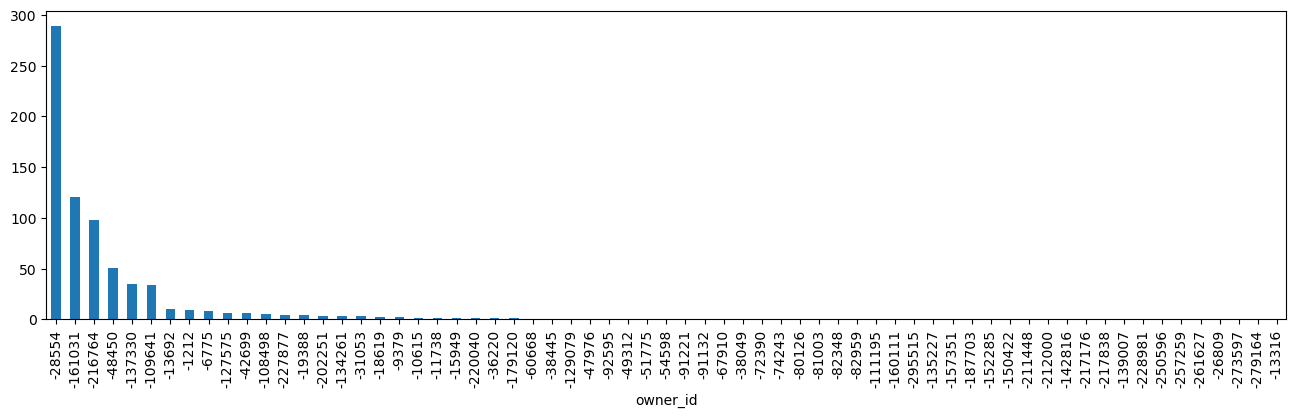

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
sdf.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.show()

## LAB WORK #5

We have already seen how to get data jn one member of the group with metod `users.get`, but this method can take many members' ids at once. For the home assignmebt you have to:
1. Use `users.get` method for several members' ids 
2. Collect data on many users (at least 100 members)
3. Find the data about university(ies) for the each member
4. Draw a stat in a form of histogram to find frequency of universities in the collected dataset

### Hints for lab work

In [ ]:
# you may pass members' ids to `users` parameter of the query like a string with comma separated
users = '11738,1212' 
url = ''.join([
    f'https://api.vk.com/method/{method}?',
    f'user_ids={users}',
    f'&fields={fields}',
    f'&access_token={TOKEN}',
    f'&v={VER}'
])
print(url)

### <font color='green'>Solution</font>

In [ ]:
# YOUR CODE HERE